In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
pd.set_option('display.max_rows', 40)

In [3]:
pd.options.display.float_format = '{:.6f}'.format

In [4]:
train = pd.read_csv('./aihub_train.csv')
test = pd.read_csv('./aihub_valid.csv')

In [5]:
train.describe()

,표준어,제주어
count,2774257,2774257
unique,2372566,2389322
top,응,응
freq,27617,27472


In [6]:
test.describe()

,표준어,제주어
count,333802,333802
unique,294830,296387
top,응,응
freq,2669,2647


In [7]:
# 중복 제거
train = train.drop_duplicates()

In [8]:
test  = test.drop_duplicates()

In [9]:
train.describe()

,표준어,제주어
count,2398367,2398367
unique,2372566,2389322
top,그래서,게난
freq,180,36


In [10]:
test.describe()

,표준어,제주어
count,297173,297173
unique,294830,296387
top,그러니까,게난
freq,51,10


## 길이 살펴보기

In [11]:
train.loc[:,'s_len'] = train.loc[:,'표준어'].apply(lambda x: len(x))

In [12]:
train.loc[:,'j_len'] = train.loc[:,'제주어'].apply(lambda x: len(x))

In [305]:
train

,표준어,제주어,s_len,j_len
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도,19,19
1,어어 그니까,어어 그니까,6,6
2,아 잘도,아 잘도,4,4
3,예초기 뱀도 짤려,예초기 뱀도 짤려,9,9
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해,12,12
...,...,...,...,...
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,61,61
2774252,&name3&이 &name3&이가 그거 아니야 작은 거 가지고 있던데,&name3&이 &name3&이가 그거 아니 쬐그만한 거 가지고 있던데,38,39
2774253,어 맞아 나 좀 작은데,어 맞아 나 좀 쬐끄만한디,12,14
2774254,네가 그거인 거 같아.,네가 그거인 거 닮.,12,11


In [53]:
train.describe()

,s_len,j_len
count,2398367.000000,2398367.000000
mean,20.925002,20.585094
std,12.554869,12.414773
min,1.000000,1.000000
25%,11.000000,11.000000
50%,18.000000,18.000000
75%,28.000000,27.000000
max,340.000000,338.000000


In [95]:
for i in range(10,100,10):
    print(i,"이상",sum(train['s_len']>i)/len(train))

10 이상 0.7850362350716134
20 이상 0.4359616355628642
30 이상 0.19814440408828174
40 이상 0.07623895759072735
50 이상 0.02692665467795379
60 이상 0.009051575509502923
70 이상 0.0030858496635419014
80 이상 0.0011682949273401444
90 이상 0.00047240476540913044


In [96]:
for i in range(10,100,10):
    print(i,"이상",sum(train['j_len']>i)/len(train))

10 이상 0.7770520525007224
20 이상 0.4250725597875554
30 이상 0.1895694028478544
40 이상 0.07188849746515025
50 이상 0.025258436261005927
60 이상 0.008492862018198216
70 이상 0.002906977956251066
80 이상 0.0011019998190435409
90 이상 0.00044738774341041216


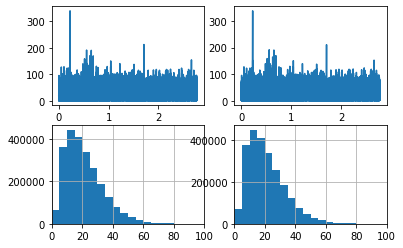

In [100]:
# 문장별 길이
plt.subplot(221)
plt.plot(train['s_len'])

plt.subplot(222)
plt.plot(train['j_len'])

#문장 길이별 문장 수
plt.subplot(223)
plt.hist(train['s_len'],bins=np.arange(0, 100, 5))
plt.xlim(0,100)
plt.grid(True)

plt.subplot(224)
plt.hist(train['j_len'],bins=np.arange(0, 100, 5))
plt.xlim(0,100)
plt.grid(True)

(0.0, 10.0)

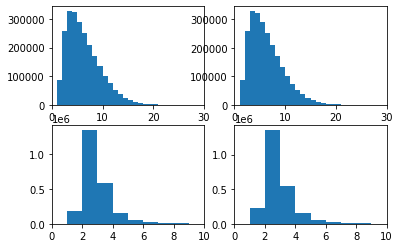

In [121]:
# 문장별 단어수(띄어쓰기 기준)
plt.subplot(221)
plt.hist(train['표준어'].str.split().map(lambda x : len(x)),bins=np.arange(0, 30, 1))
plt.xlim(0,30)

plt.subplot(222)
plt.hist(train['제주어'].str.split().map(lambda x : len(x)),bins=np.arange(0, 30, 1))
plt.xlim(0,30)

# 문장별 토큰 길이 평균
plt.subplot(223)
plt.hist(train['표준어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),bins=np.arange(0, 10, 1))
plt.xlim(0,10)

plt.subplot(224)
plt.hist(train['제주어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),bins=np.arange(0, 10, 1))
plt.xlim(0,10)


In [306]:
train['s_token_len_mean']=train['표준어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

In [307]:
train['j_token_len_mean']=train['제주어'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

In [309]:
train[train['s_token_len_mean']>=6][['표준어','제주어']]

,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
31,그 풀옆에(이)/(#이) 가기싫어(게)/(#게),그 풀옆에(이)/(#이) 가기싫어(게)/(#게)
35,그렇게하더라고,겅하더라고
43,귀찮아? {laughing},귀찮아? {laughing}
...,...,...
2774146,요즘도 많이 놀러가는(구먼)/(구나),요즘도 많이 놀러가는(구먼)/(구나)
2774150,제주도라도 가고(정)/(싶어) 하지#게,제주도라도 가고(정)/(싶어) 하주게
2774160,이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게),이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게)
2774214,((xx)) 재미(있언)/(있었어),((xx)) 재미(있언)/(있었어)


In [310]:
train[train['j_token_len_mean']>=6][['표준어','제주어']]

,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
31,그 풀옆에(이)/(#이) 가기싫어(게)/(#게),그 풀옆에(이)/(#이) 가기싫어(게)/(#게)
43,귀찮아? {laughing},귀찮아? {laughing}
45,어어 {laughing},어어 {laughing}
...,...,...
2774146,요즘도 많이 놀러가는(구먼)/(구나),요즘도 많이 놀러가는(구먼)/(구나)
2774150,제주도라도 가고(정)/(싶어) 하지#게,제주도라도 가고(정)/(싶어) 하주게
2774160,이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게),이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게)
2774214,((xx)) 재미(있언)/(있었어),((xx)) 재미(있언)/(있었어)


In [311]:
train[(train['s_token_len_mean']>=6) | (train['j_token_len_mean']>=6)][['표준어','제주어']]

,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
31,그 풀옆에(이)/(#이) 가기싫어(게)/(#게),그 풀옆에(이)/(#이) 가기싫어(게)/(#게)
35,그렇게하더라고,겅하더라고
43,귀찮아? {laughing},귀찮아? {laughing}
...,...,...
2774146,요즘도 많이 놀러가는(구먼)/(구나),요즘도 많이 놀러가는(구먼)/(구나)
2774150,제주도라도 가고(정)/(싶어) 하지#게,제주도라도 가고(정)/(싶어) 하주게
2774160,이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게),이제 봄 와(가믄)/(가면) 더 할(거주)/(거지)(게)/(#게)
2774214,((xx)) 재미(있언)/(있었어),((xx)) 재미(있언)/(있었어)


In [312]:
train['s_set'] = train.loc[:,'표준어'].str.split().apply(lambda x: set(x))
train['j_set'] = train.loc[:,'제주어'].str.split().apply(lambda x: set(x))

In [314]:
def f(x):
    return x[0].intersection(x[1])

In [315]:
train['intersection']= train[['s_set','j_set']].apply(f,axis=1)

In [316]:
def intersection_rate(x):
    return len(x[0])/len(x[1])

In [317]:
train['s_intersection_rate'] = train[['intersection','s_set']].apply(intersection_rate,axis=1)

In [318]:
train['j_intersection_rate'] = train[['intersection','j_set']].apply(intersection_rate,axis=1)

In [319]:
train[['s_intersection_rate','j_intersection_rate']].describe()

,s_intersection_rate,j_intersection_rate
count,2398367.000000,2398367.000000
mean,0.841530,0.842892
std,0.228263,0.226433
min,0.000000,0.000000
25%,0.750000,0.750000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


(array([[  51124.,    4200.,   26228.,   43711.,   32874.,  204178.,
          168995.,  178605.,  328772., 1359680.],
        [  51120.,    3433.,   24051.,   41875.,   30673.,  203463.,
          170100.,  180351.,  334188., 1359113.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

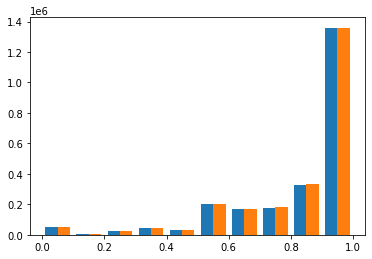

In [320]:
plt.hist(train[['s_intersection_rate','j_intersection_rate']])

In [321]:
len(train)-(train['s_intersection_rate']==train['j_intersection_rate']).sum()

73428

In [322]:
train[train['표준어']==train['제주어']]

,표준어,제주어,s_len,j_len,s_token_len_mean,j_token_len_mean,s_set,j_set,intersection,s_intersection_rate,j_intersection_rate
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도,19,19,2.333333,2.333333,"{진짜, 벌초, 뱀도, 난, 뱀나오잖아, 할때}","{진짜, 벌초, 뱀도, 난, 뱀나오잖아, 할때}","{진짜, 벌초, 뱀도, 난, 뱀나오잖아, 할때}",1.000000,1.000000
1,어어 그니까,어어 그니까,6,6,2.500000,2.500000,"{그니까, 어어}","{그니까, 어어}","{어어, 그니까}",1.000000,1.000000
2,아 잘도,아 잘도,4,4,1.500000,1.500000,"{아, 잘도}","{아, 잘도}","{아, 잘도}",1.000000,1.000000
3,예초기 뱀도 짤려,예초기 뱀도 짤려,9,9,2.333333,2.333333,"{짤려, 뱀도, 예초기}","{짤려, 뱀도, 예초기}","{짤려, 뱀도, 예초기}",1.000000,1.000000
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해,12,12,2.250000,2.250000,"{어, 끔찍해, 그니까, 완전}","{어, 끔찍해, 그니까, 완전}","{완전, 어, 그니까, 끔찍해}",1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,24,24,4.000000,4.000000,"{응, 쏠쏠(한게)/(하다), 다니느, 재미가, 회사}","{응, 쏠쏠(한게)/(하다), 다니느, 재미가, 회사}","{응, 쏠쏠(한게)/(하다), 다니느, 재미가, 회사}",1.000000,1.000000
2774244,보드게임 중에서도 막 오래 걸리는 게임들 이런 것도 코로나 때문에 요즘 집에서 막,보드게임 중에서도 막 오래 걸리는 게임들 이런 것도 코로나 때문에 요즘 집에서 막,45,45,2.538462,2.538462,"{오래, 집에서, 이런, 걸리는, 때문에, 것도, 요즘, 코로나, 중에서도, 막, ...","{오래, 집에서, 이런, 걸리는, 때문에, 것도, 요즘, 코로나, 중에서도, 막, ...","{오래, 집에서, 이런, 걸리는, 때문에, 것도, 요즘, 중에서도, 코로나, 막, ...",1.000000,1.000000
2774247,카드 게임 {laughing},카드 게임 {laughing},16,16,4.666667,4.666667,"{{laughing}, 카드, 게임}","{{laughing}, 카드, 게임}","{카드, 게임, {laughing}}",1.000000,1.000000
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,61,61,2.875000,2.875000,"{뭐냐, 다닐, 수도, 그리고, 루미큐브도, 작은, 다니고, 요즘, 것도, 루미큐브...","{뭐냐, 다닐, 수도, 그리고, 루미큐브도, 작은, 다니고, 요즘, 것도, 루미큐브...","{뭐냐, 다닐, 그리고, 루미큐브도, 작은, 다니고, 요즘, 것도, 루미큐브, 거,...",1.000000,1.000000


In [323]:
1281978/len(train)

0.5345211971312147

# 데이터 살펴보기

In [13]:
train[train['표준어']=='그래서'][['표준어','제주어']]

,표준어,제주어
6043,그래서,그래서
8466,그래서,그래그넹
10622,그래서,경해영
14222,그래서,경해그냉
15868,그래서,겅행
...,...,...
2500921,그래서,겅해내
2500955,그래서,겅핸애
2526579,그래서,그래 가지구
2551807,그래서,경해부니까


In [14]:
train[train['제주어']=='게난'][['표준어','제주어']]

,표준어,제주어
154,그러니까,게난
2434,그니까,게난
7094,그러니깐,게난
24224,게난,게난
37976,그니깐,게난
...,...,...
2522171,그래가지고,게난
2613011,그르니까,게난
2627621,근데,게난
2655134,그러닌까,게난


In [15]:
train[train['표준어'].str.contains('{')]

,표준어,제주어,s_len,j_len
43,귀찮아? {laughing},귀찮아? {laughing},15,15
45,어어 {laughing},어어 {laughing},13,13
75,없어서 벌초할사람 없어서 진짜 저 다 납골당{laughing} 같은데,어서그네 벌초할사람 어선 진짜 저 다 납골당{laughing} 같은데,38,38
141,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어,46,46
142,그 그러니까 너도 이 아들 많이 낳아 {laughing},그 그러니까 너도 이 아들 많이 낳으라게 {laughing},31,33
...,...,...,...,...
2774219,{laughing} 다 들(켠)/(켰어) 다 죽었어,{laughing} 다 들(켠)/(켰어) 다 죽언,28,27
2774221,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이제는,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이젠,46,45
2774229,쟤 당황(행)/(해서)(그넹)/(#그넹) 간다 이렇게 하는 거 아니야 어 {laug...,자이 당황(행)/(해서)(그넹)/(#그넹) 감쪄 영 하는 거 아니 어 {laughing},51,49
2774246,나 집에 할리갈리 있어 루미큐브도 있어 할리갈리는 보드게임이 아니야 {laughing},나 집에 할리갈리 이서 루미큐브도 이서 할리갈리는 보드게임이 아니야 {laughing},48,48


In [16]:
import re

In [17]:
# '{' 또는 '}' 포함 문장 
train[(train['표준어'].str.contains('{|}'))|(train['제주어'].str.contains('{|}'))][['표준어','제주어']]

,표준어,제주어
43,귀찮아? {laughing},귀찮아? {laughing}
45,어어 {laughing},어어 {laughing}
75,없어서 벌초할사람 없어서 진짜 저 다 납골당{laughing} 같은데,어서그네 벌초할사람 어선 진짜 저 다 납골당{laughing} 같은데
141,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어
142,그 그러니까 너도 이 아들 많이 낳아 {laughing},그 그러니까 너도 이 아들 많이 낳으라게 {laughing}
...,...,...
2774219,{laughing} 다 들(켠)/(켰어) 다 죽었어,{laughing} 다 들(켠)/(켰어) 다 죽언
2774221,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이제는,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이젠
2774229,쟤 당황(행)/(해서)(그넹)/(#그넹) 간다 이렇게 하는 거 아니야 어 {laug...,자이 당황(행)/(해서)(그넹)/(#그넹) 감쪄 영 하는 거 아니 어 {laughing}
2774246,나 집에 할리갈리 있어 루미큐브도 있어 할리갈리는 보드게임이 아니야 {laughing},나 집에 할리갈리 이서 루미큐브도 이서 할리갈리는 보드게임이 아니야 {laughing}


In [18]:
# '{','}' 둘다 포함 문장
train[(train['표준어'].str.contains('{\S*}'))|(train['제주어'].str.contains('{\S*}'))][['표준어','제주어']]

,표준어,제주어
43,귀찮아? {laughing},귀찮아? {laughing}
45,어어 {laughing},어어 {laughing}
75,없어서 벌초할사람 없어서 진짜 저 다 납골당{laughing} 같은데,어서그네 벌초할사람 어선 진짜 저 다 납골당{laughing} 같은데
141,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어,나때는 있지만 {laughing} 나때는 있지만 이 &name1&때는 없을수도 있어
142,그 그러니까 너도 이 아들 많이 낳아 {laughing},그 그러니까 너도 이 아들 많이 낳으라게 {laughing}
...,...,...
2774219,{laughing} 다 들(켠)/(켰어) 다 죽었어,{laughing} 다 들(켠)/(켰어) 다 죽언
2774221,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이제는,어디(간)/(갔어) {laughing} 누가 거짓말 못하고 이런 거 다 알아 이젠
2774229,쟤 당황(행)/(해서)(그넹)/(#그넹) 간다 이렇게 하는 거 아니야 어 {laug...,자이 당황(행)/(해서)(그넹)/(#그넹) 감쪄 영 하는 거 아니 어 {laughing}
2774246,나 집에 할리갈리 있어 루미큐브도 있어 할리갈리는 보드게임이 아니야 {laughing},나 집에 할리갈리 이서 루미큐브도 이서 할리갈리는 보드게임이 아니야 {laughing}


In [19]:
# '(' 또는 ')' 포함 문장
train[(train['표준어'].str.contains('\(|\)'))|(train['제주어'].str.contains('\(|\)'))][['표준어','제주어']]

,표준어,제주어
9,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
17,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐)
...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대)
2774248,어 루미큐브 재밌지 큐브가 어 그것도 조커 두 개만 있는 줄 알았는데 여러 가지 있...,어 루미큐브 재밌지 큐브가 어 것도 조커 두 개만 있는 줄 알았는데 여러 가지 있더...
2774250,색깔 반전 시키는 것도 있다고 하고(이)/(#이),색깔 반전 시키는 것도 있댄 하고(이)/(#이)


In [20]:
# "(",")" 둘다 포함 문장
train[(train['표준어'].str.contains('\(\S*\)'))|(train['제주어'].str.contains('\(\S*\)'))][['표준어','제주어']]

,표준어,제주어
9,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
17,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐)
...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대)
2774248,어 루미큐브 재밌지 큐브가 어 그것도 조커 두 개만 있는 줄 알았는데 여러 가지 있...,어 루미큐브 재밌지 큐브가 어 것도 조커 두 개만 있는 줄 알았는데 여러 가지 있더...
2774250,색깔 반전 시키는 것도 있다고 하고(이)/(#이),색깔 반전 시키는 것도 있댄 하고(이)/(#이)


In [21]:
# '()' 포함 문장
train[(train['표준어'].str.contains('\(\)'))|(train['제주어'].str.contains('\(\)'))][['표준어','제주어']]

,표준어,제주어
99,일일이 산소 못하(()),일일이 산소 못하(())
187,(())없다는거야,(())없대는거라
252,다 모여서 (())구나 어,다 모영 (())구나 어
276,명절 때 우리 오빠는 새옷을 별로 (())같아,명절 때 우리 오빠는 새옷을 별로 (())닮아
294,얻어 신(()),얻어 신(())
...,...,...
2774223,(()) 맞아 표정 숨길 수 있어서 매우 좋아,(()) 맞아 표정 숨길 수 있어서 잘도 좋아
2774233,이어 붙이면서 예를 들어서 우리 막 (()) 부심 같은 거 부리거든,이어 붙이면서 예를 들어서 우리 막 (()) 부심 같은 거 부리거든
2774234,(()) 조금 이제 조금 매운 걸 먹었어,(()) 조금 이제 조금 매운 걸 먹었어
2774235,그런데 누구 막 물 마시러 (()) 물 마시러 가시는 거 아니죠 막 이런 식,그런데 누구 막 물 마시러 (()) 물 마시러 가시는 거 아니죠 막 이런 식


In [22]:
#문장 중간에 '.' 있는 경우
train[(train['표준어'].str.contains('\.\S+'))|(train['제주어'].str.contains('\.\S+'))][['표준어','제주어']]

,표준어,제주어
1198,모르겠어.,모르쿠다..
1444,아닙니다.아닙니다.,아니우다.아니우다.
1445,아니 아니다.{laughing},아니 아니다.{laughing}
1499,싫어.{laughing},싫어.{laughing}
3658,차 버렸대. 안(된댄.)/(된대.),차 부렀댄. 안(된댄.)/(된대.)
...,...,...
2773919,새 거면 당근에 팔아(부러.)/(버려.),새 거면 당근에 팔아(부러.)/(버려.)
2773936,살 쪄(부난)/(서) 걱정(이주.)/(지.),살 쪄(부난)/(서) 걱정(이주.)/(지.)
2774022,경연 -순- 사실 이거 듣는 어떤 무대라는 게 (())하는데 순서도 완전 중요한 영...,경연 -순- 사실 이거 듣는 어떤 무대라는 게 (())하는데 순서도 완전 중요한 영...
2774028,그런 거 가지고도 얘기가 많(안.)/(았어.),그런 거 가지고도 얘기가 많(안.)/(았어.)


In [23]:
# {laughing},(()), 맨앞 점, 마침표 제거
def preprocessing(x):
    x = re.sub('({\S+)ing(\S*})',"",x)
    x = re.sub('\(\(\)\)','',x)
    x = re.sub('^\.','',x)
    x = re.sub('\.$','',x)
    x = re.sub('{','',x)
    x = re.sub('}','',x) # {만} 데이터는??
    x = re.sub('\(\(','\(',x)
    x = re.sub('\)\)','\)',x)
    return x

In [24]:
train['표준어'] = train['표준어'].apply(preprocessing)
train['제주어'] = train['제주어'].apply(preprocessing)

In [25]:
train[(train['제주어'].str.contains('\.\S+'))][['표준어','제주어']]

,표준어,제주어
1444,아닙니다.아닙니다,아니우다.아니우다
3658,차 버렸대. 안(된댄.)/(된대.),차 부렀댄. 안(된댄.)/(된대.)
4745,그래서 맨날.점심. 이 점심 시간이 수요일이. 목요일이 내는 거였나? 그랬거든,그래서 맨날.점심. 이 점심 시간이 수요일이. 목요일이 내는 거였나? 그랬거든
4857,아니.아니. 신기해 근데 뭔가. 나는,아니.아니. 신기해 근데 뭔가. 나는
4922,이 여기에. 그 오? 바닥에.아 이거. 이게 오로라라해가지고 앉아서 찍을 수 있는 ...,이 여기에. 그 오? 바닥에.아 이거. 이게 오로라라해가지고 앉아서 찍을 수 있는 ...
...,...,...
2773919,새 거면 당근에 팔아(부러.)/(버려.),새 거면 당근에 팔아(부러.)/(버려.)
2773936,살 쪄(부난)/(서) 걱정(이주.)/(지.),살 쪄(부난)/(서) 걱정(이주.)/(지.)
2774022,경연 -순- 사실 이거 듣는 어떤 무대라는 게 하는데 순서도 완전 중요한 영향을 미...,경연 -순- 사실 이거 듣는 어떤 무대라는 게 하는데 순서도 완전 중요한 영향을 미...
2774028,그런 거 가지고도 얘기가 많(안.)/(았어.),그런 거 가지고도 얘기가 많(안.)/(았어.)


In [26]:
train['s_re'] = train['표준어'].str.findall('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)')
train['j_re'] = train['제주어'].str.findall('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)')

In [27]:
temp = train[train['s_re'].apply(lambda x:len(x)!=0)]
temp

,표준어,제주어,s_len,j_len,s_re,j_re
9,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,아 예초하다가(이)/(#이) 뱀 나온거야 뱀이 하나 도 아니고,34,34,"[(이, #이)]","[(이, #이)]"
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가),21,21,"[(하다그네, 하다가)]","[(하다그네, 하다가)]"
17,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,나 아는 사람이 벌 이거(이)/(#이) 그거 벌초하다가 예초기가,35,35,"[(이, #이)]","[(이, #이)]"
26,예초기가(이)/(#이) 위험하다는 말이야,예초기가(이)/(#이) 위험하다는 말이야,22,22,"[(이, #이)]","[(이, #이)]"
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),26,26,"[(나올카부덴이, 나올까봐)]","[(나올카부덴이, 나올까봐)]"
...,...,...,...,...,...,...
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,24,24,"[(한게, 하다)]","[(한게, 하다)]"
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대),34,34,"[(댄, 대)]","[(댄, 대)]"
2774248,어 루미큐브 재밌지 큐브가 어 그것도 조커 두 개만 있는 줄 알았는데 여러 가지 있...,어 루미큐브 재밌지 큐브가 어 것도 조커 두 개만 있는 줄 알았는데 여러 가지 있더...,58,57,"[(이, #이)]","[(이, #이)]"
2774250,색깔 반전 시키는 것도 있다고 하고(이)/(#이),색깔 반전 시키는 것도 있댄 하고(이)/(#이),27,26,"[(이, #이)]","[(이, #이)]"


In [28]:
train.loc[563]

표준어      막(겅)/(그렇게) 이 시대가 그렇게 바껴(부럼잖아?)/(버렸잖아?)(이)/(#이)
제주어        막(겅)/(그렇게) 이 시대가 겅 바껴(부럼잖아?)/(버렸잖아?)(이)/(#이)
s_len                                                46
j_len                                                44
s_re                [(겅, 그렇게), (부럼잖아?, 버렸잖아?), (이, #이)]
j_re                [(겅, 그렇게), (부럼잖아?, 버렸잖아?), (이, #이)]
Name: 563, dtype: object

In [29]:
train[train['s_re']!=train['j_re']]

,표준어,제주어,s_len,j_len,s_re,j_re
220605,그런데사람들은 그걸 어떻게알아(게)/(#게),겅한디사람들은 그걸 모르주기게) (어떵알아(게)/(#게),24,31,"[(게, #게)]","[(어떵알아(게, #게)]"
246217,저~ 조상들 다 받아내 제일 싼(양)/(#양),저~ 조상들 다 받아내 (연료 덮개\) 화장시킬 때는 이만원짜리인가 그 (질 싼(양...,25,52,"[(양, #양)]","[(질 싼(양, #양)]"
361368,아이고 먼저 간 아이들이 마세요 난리우다)/(난리에요) 지금 언니오면 여기서 차,아이고 먼저 간 아이들이 언니 이까지 오지 (맙써 난리우다)/(난리에요) 지금 언니...,44,54,[],"[(맙써 난리우다, 난리에요)]"
648300,한락산 한락산 한로산 다 말합니다 한로산(예)/(#예),한락산 한락산 한로산 다 겅)(그렇게) (골음니다 한로산(예)/(#예),30,39,"[(예, #예)]","[(골음니다 한로산(예, #예)]"
742368,내가 한 번 오지(말랜 했젠.)/(말라고 했대요.),따시도또시/)(다시 또 다시) (나가 한* 번 오지(말랜 했젠.)/(말라고 했대요.),28,47,"[(말랜 했젠., 말라고 했대요.)]","[(나가 한* 번 오지(말랜 했젠., 말라고 했대요.)]"
...,...,...,...,...,...,...
2360493,걔 친군 걔 친구는 엄청 이렇게)/(많이) 있는데,가이 친군 가이 친구는 잘도 하(영)/(많이) 이신디,27,29,[],"[(영, 많이)]"
2612583,좀 귀하게 여기면서 하지 않고 얘기했지요 그 때 나는 어머니(영)/(하고) 사는 거...,좀 귀하게 여경으네 허지를 않고 개난) 난 (고라쭈게 그 때 나는 어머니(영)/(하...,54,61,"[(영, 하고)]","[(고라쭈게 그 때 나는 어머니(영, 하고)]"
2661048,어떤 되려나. 보게된다. 하다못해. 빨래만 하려고해도. 이불빨래만해도 빨래.만해(도...,어떤 행신고. 것부터.).(그것부터.) (봐져. 허당못행. 빨래만 허잰해도. 이불빨...,91,101,"[(도게., 도.)]","[(봐져. 허당못행. 빨래만 허잰해도. 이불빨래만해도 서답.만해(도게., 도.)]"
2661168,한.다 해도 편안하게 사는거(라)/(야),겅.)(그렇게.)(헌.다 해도 편안하게 사는거(라)/(야),22,32,"[(라, 야)]","[(헌.다 해도 편안하게 사는거(라, 야)]"


In [30]:
def choose(x):
    if re.findall('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)',x[0])==re.findall('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)',x[1]):
        x[0] = re.sub('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)','\\2',x[0])
        x[1] = re.sub('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)','\\1',x[1])
    return x

In [31]:
train[['표준어','제주어']] = train[['표준어','제주어']].apply(choose,axis=1)

In [32]:
train

,표준어,제주어,s_len,j_len,s_re,j_re
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도,19,19,[],[]
1,어어 그니까,어어 그니까,6,6,[],[]
2,아 잘도,아 잘도,4,4,[],[]
3,예초기 뱀도 짤려,예초기 뱀도 짤려,9,9,[],[]
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해,12,12,[],[]
...,...,...,...,...,...,...
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,61,61,[],[]
2774252,&name3&이 &name3&이가 그거 아니야 작은 거 가지고 있던데,&name3&이 &name3&이가 그거 아니 쬐그만한 거 가지고 있던데,38,39,[],[]
2774253,어 맞아 나 좀 작은데,어 맞아 나 좀 쬐끄만한디,12,14,[],[]
2774254,네가 그거인 거 같아,네가 그거인 거 닮,12,11,[],[]


In [39]:
train[train['s_re']!=train['j_re']]

,표준어,제주어,s_len,j_len,s_re,j_re
220605,그런데사람들은 그걸 어떻게알아(게)/(#게),겅한디사람들은 그걸 모르주기게) (어떵알아(게)/(#게),24,31,"[(게, #게)]","[(어떵알아(게, #게)]"
246217,저~ 조상들 다 받아내 제일 싼(양)/(#양),저~ 조상들 다 받아내 (연료 덮개\) 화장시킬 때는 이만원짜리인가 그 (질 싼(양...,25,52,"[(양, #양)]","[(질 싼(양, #양)]"
361368,아이고 먼저 간 아이들이 마세요 난리우다)/(난리에요) 지금 언니오면 여기서 차,아이고 먼저 간 아이들이 언니 이까지 오지 (맙써 난리우다)/(난리에요) 지금 언니...,44,54,[],"[(맙써 난리우다, 난리에요)]"
648300,한락산 한락산 한로산 다 말합니다 한로산(예)/(#예),한락산 한락산 한로산 다 겅)(그렇게) (골음니다 한로산(예)/(#예),30,39,"[(예, #예)]","[(골음니다 한로산(예, #예)]"
742368,내가 한 번 오지(말랜 했젠.)/(말라고 했대요.),따시도또시/)(다시 또 다시) (나가 한* 번 오지(말랜 했젠.)/(말라고 했대요.),28,47,"[(말랜 했젠., 말라고 했대요.)]","[(나가 한* 번 오지(말랜 했젠., 말라고 했대요.)]"
902566,거기는 하기는 수영장도 가깝고 #게마씸(게)/(#게).)/(좋네요.),거기는 하기는 수영장도 가깝고 좋은(게마씸(게)/(#게).)/(좋네요.),38,40,"[(게, #게)]","[(게마씸(게, #게)]"
902569,그러니까 나 친구 한 명 거기에서 맨날 #게마씸.)/(수영했어.),게난 나 친구 한 명 거기에서 맨날 수영핸(게마씸.)/(수영했어.),36,37,[],"[(게마씸., 수영했어.)]"
902606,요가는 진짜 그렇게 #게마씸.)/(하네요.),요가는 진짜 겅 한(게마씸.)/(하네요.),24,23,[],"[(게마씸., 하네요.)]"
907016,보니까요 엄청 어수선(합디다게)/(하더라구요) 어저께 삼학년 오랜만에 일주일 쉬고 ...,게난) 어제도 (보난예 막 어수선(합디다게)/(하더라구요) 어저께 삼학년 오랜만에 ...,56,63,"[(합디다게, 하더라구요), (예, 요)]","[(보난예 막 어수선(합디다게, 하더라구요), (예, 요)]"
1079536,그거 불법 아닌가 그런데?)/(그런데?),거 불법 아닌가 (근데?)/(그런데?),22,21,[],"[(근데?, 그런데?)]"


In [45]:
# '(' 또는 ')' 
train[(train['표준어'].str.contains('\(|\)'))|(train['제주어'].str.contains('\(|\)'))][['표준어','제주어']]

,표준어,제주어
596,\(이제여행\)다녀버리잖아?,\(이제여행\)다녀불잖아?
838,하루에 몇 시간을 달\(xxxxxxxx\),하루에 몇 시간을 달\(xxxxxxxx\)
847,\(x\) 학교 안 나와,\(x\) 학교 안 나와
853,엄청 \(xxx\) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데,엄청 \(xxx\) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데
861,\(xxx?\),\(xxx?\)
...,...,...
2773951,잘 안 올려(부난)(서),잘 안 올려(부난)(서)
2774044,이렇게 \(생각\),이렇게 \(생각\)
2774110,가야\(x\),가야\(x\)
2774133,만약에 동서울에서 출발하면 여기 \(xx\) 아이씨에서 내리면 훨씬 가까,만약에 동서울에서 출발하면 여기 \(xx\) 아이씨에서 내리면 훨씬 가까


In [44]:
# '(' ')' 둘다 포함
train[(train['표준어'].str.contains('\(\S*\)'))|(train['제주어'].str.contains('\(\S*\)'))][['표준어','제주어']]

,표준어,제주어
596,\(이제여행\)다녀버리잖아?,\(이제여행\)다녀불잖아?
838,하루에 몇 시간을 달\(xxxxxxxx\),하루에 몇 시간을 달\(xxxxxxxx\)
847,\(x\) 학교 안 나와,\(x\) 학교 안 나와
853,엄청 \(xxx\) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데,엄청 \(xxx\) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데
861,\(xxx?\),\(xxx?\)
...,...,...
2773951,잘 안 올려(부난)(서),잘 안 올려(부난)(서)
2774044,이렇게 \(생각\),이렇게 \(생각\)
2774110,가야\(x\),가야\(x\)
2774133,만약에 동서울에서 출발하면 여기 \(xx\) 아이씨에서 내리면 훨씬 가까,만약에 동서울에서 출발하면 여기 \(xx\) 아이씨에서 내리면 훨씬 가까


In [42]:
train[(train['표준어'].str.contains('x'))|(train['제주어'].str.contains('x'))][['표준어','제주어']]

,표준어,제주어
838,하루에 몇 시간을 달\(xxxxxxxx\),하루에 몇 시간을 달\(xxxxxxxx\)
847,\(x\) 학교 안 나와,\(x\) 학교 안 나와
853,엄청 \(xxx\) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데,엄청 \(xxx\) 까먹을 정도로 그런데 무슨 교육 받으러 간다는데
861,\(xxx?\),\(xxx?\)
890,둘이 무리해서 \(xxxx\),둘이 무리해서 \(xxxx\)
...,...,...
2773821,내가 보는 중국 \(xx\) 쉽네 거의 한두 달 쉬는 거 같아,내가 보는 중국 \(xx\) 쉽네 거의 한두 달 쉬는 거 닮아
2773842,\(xx\) 이거 많고 많지#게,\(xx\) 이거 싸고 쌌져게
2774110,가야\(x\),가야\(x\)
2774133,만약에 동서울에서 출발하면 여기 \(xx\) 아이씨에서 내리면 훨씬 가까,만약에 동서울에서 출발하면 여기 \(xx\) 아이씨에서 내리면 훨씬 가까


In [46]:
train[train['표준어'].str.contains('\((\S+)\)/\((\S+)\)')|train['제주어'].str.contains('\((\S+)\)/\((\S+)\)')][['표준어','제주어']]

/opt/conda/envs/lightweight/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,표준어,제주어
220605,그런데사람들은 그걸 어떻게알아(게)/(#게),겅한디사람들은 그걸 모르주기게) (어떵알아(게)/(#게)
246217,저~ 조상들 다 받아내 제일 싼(양)/(#양),저~ 조상들 다 받아내 (연료 덮개\) 화장시킬 때는 이만원짜리인가 그 (질 싼(양...
648300,한락산 한락산 한로산 다 말합니다 한로산(예)/(#예),한락산 한락산 한로산 다 겅)(그렇게) (골음니다 한로산(예)/(#예)
902566,거기는 하기는 수영장도 가깝고 #게마씸(게)/(#게).)/(좋네요.),거기는 하기는 수영장도 가깝고 좋은(게마씸(게)/(#게).)/(좋네요.)
902569,그러니까 나 친구 한 명 거기에서 맨날 #게마씸.)/(수영했어.),게난 나 친구 한 명 거기에서 맨날 수영핸(게마씸.)/(수영했어.)
902606,요가는 진짜 그렇게 #게마씸.)/(하네요.),요가는 진짜 겅 한(게마씸.)/(하네요.)
907016,보니까요 엄청 어수선(합디다게)/(하더라구요) 어저께 삼학년 오랜만에 일주일 쉬고 ...,게난) 어제도 (보난예 막 어수선(합디다게)/(하더라구요) 어저께 삼학년 오랜만에 ...
1073303,맛있어? 맛은 인(?)/(있어?),맛인? 맛은 인(?)/(있어?)
1079536,그거 불법 아닌가 그런데?)/(그런데?),거 불법 아닌가 (근데?)/(그런데?)
1153901,박을 수 있다면심겠어요#게. 어(게.)/(#게.),싱그민양.)(#양.) (식그쿠다게. 어(게.)/(#게.)


In [49]:
correct = train[train['s_re']!=train['j_re']]

In [52]:
correct.to_csv('./correct.csv')

In [47]:
train[(train['표준어'].str.contains('&name\S'))|(train['제주어'].str.contains('&name\S*'))][['표준어','제주어']]

,표준어,제주어
140,너때는 있어 이아이 &name1&있잖아,너때는 있어 이아이 &name1&있시메
141,나때는 있지만 나때는 있지만 이 &name1&때는 없을수도 있어,나때는 있지만 나때는 있지만 이 &name1&때는 없을수도 있어
302,&name1&이는 너 저기 명절때 뭐 기억나는거 있어? 특별히?,&name1&이는 너 저기 명절때 뭐 기억나는거 이서? 특별히?
844,대박 근데 &name1&는 어쩔 생각인지 궁금하네,대박 근데 &name1&는 어쩔 생각인지 궁금하네
849,&name1&가 우리 반 이거든,&name1&가 우리 반 이거든
...,...,...
2773803,&name2&만 뭐하면 될 거야?,&name2&만 뭐하면 될 거?
2773804,&name2&는 &name2&는 나는 모델 할게 모델,&name2&는 &name2&는 나는 모델 할게 모델
2773944,&name3&이도 인스타 있고 나도 인스타 있지만 서로 친구는 안 했어 팔로우는,&name3&이도 인스타 있고 나도 인스타 있지만 서로 친구는 안 핸 팔로우는
2774111,&name3&이 설 때 안 내려갈거면 나 놀러 가도 돼?,&name3&이 설 때 안 내려갈거면 나 놀러 가도 돼?


# 정리!

In [24]:
# {laughing},(()), 맨앞 점, 마침표 제거
# \S : 공백이 아닌 문자
def preprocessing(x):
    x = re.sub('({\S+)ing(\S*})',"",x)
    x = re.sub('\(\(\)\)','',x)
    x = re.sub('^\.','',x)
    x = re.sub('\.$','',x)
    x = re.sub('{','',x)
    x = re.sub('}','',x)
    x = re.sub('\(\(','\(',x)
    x = re.sub('\)\)','\)',x)
    return x

In [443]:
train1 = pd.read_csv('./aihub_train.csv')
test1 = pd.read_csv('./aihub_valid.csv')

In [444]:
# 중복 제거
train1.drop_duplicates()

,표준어,제주어
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도
1,어어 그니까,어어 그니까
2,아 잘도,아 잘도
3,예초기 뱀도 짤려,예초기 뱀도 짤려
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해
...,...,...
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...
2774252,&name3&이 &name3&이가 그거 아니야 작은 거 가지고 있던데,&name3&이 &name3&이가 그거 아니 쬐그만한 거 가지고 있던데
2774253,어 맞아 나 좀 작은데,어 맞아 나 좀 쬐끄만한디
2774254,네가 그거인 거 같아.,네가 그거인 거 닮.


In [445]:
# 필요없는 부분 삭제 
train1['표준어'] = train1['표준어'].apply(preprocessing)
train1['제주어'] = train1['제주어'].apply(preprocessing)

In [446]:
train1

,표준어,제주어
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도
1,어어 그니까,어어 그니까
2,아 잘도,아 잘도
3,예초기 뱀도 짤려,예초기 뱀도 짤려
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해
...,...,...
2774252,&name3&이 &name3&이가 그거 아니야 작은 거 가지고 있던데,&name3&이 &name3&이가 그거 아니 쬐그만한 거 가지고 있던데
2774253,어 맞아 나 좀 작은데,어 맞아 나 좀 쬐끄만한디
2774254,네가 그거인 거 같아,네가 그거인 거 닮
2774255,아 여행용(인게)/(이네),아 여행용(인게)/(이네)


In [463]:
train1[train1['표준어'].str.contains('\((\w+)\)/\((\w+)\)')|train1['제주어'].str.contains('\((\w+)\)/\((\w+)\)')][['표준어','제주어']]

/opt/conda/envs/lightweight/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,표준어,제주어
13,그러고 예초 벌초(하다그네)/(하다가),겅허고 예초 벌초(하다그네)/(하다가)
29,아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐),아 쫓아갈때 아우 뱀(나올카부덴이)/(나올까봐)
47,그냥 쫓아(댕기는)/(다니는) 거(이)/(#이),그냥 쫓아(댕기는)/(다니는) 거(이)/(#이)
117,거기 그러니까 서 완전히 가난한 사람(이주게)/(이지),거기 그러니까 서 완전히 가난한 사람(이주게)/(이지)
140,너때는 있어 이아이 &name1&(있시메)/(있잖아),너때는 있어 이아이 &name1&(있시메)/(있잖아)
...,...,...
2774225,응 극적으로 나가 들킬 것 같아(부난)/(서),응 극적으로 나가 들킬 것 같아(부난)/(서)
2774229,쟤 당황(행)/(해서)(그넹)/(#그넹) 간다 이렇게 하는 거 아니야 어,자이 당황(행)/(해서)(그넹)/(#그넹) 감쪄 영 하는 거 아니 어
2774242,회사 다니느 재미가 쏠쏠(한게)/(하다) 응,회사 다니느 재미가 쏠쏠(한게)/(하다) 응
2774245,두 명 이 인용 보드게임 이런 것도 매우 잘 팔린(댄)/(대),두 명 이 인용 보드게임 이런 것도 잘도 잘 팔린(댄)/(대)


In [498]:
def choose(x):
    if re.findall('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)',x[0])==re.findall('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)',x[1]):
        x[0] = re.sub('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)','\\2',x[0])
        x[1] = re.sub('\(([^\)]*\w+[^\)]*)\)/\(([^\)]*\w+[^\)]*)\)','\\1',x[1])
    return x

In [499]:
train1[['표준어','제주어']] = train1[['표준어','제주어']].apply(choose,axis=1)

In [500]:
train1[['표준어','제주어']]

,표준어,제주어
0,난 진짜 벌초 할때 뱀나오잖아 뱀도,난 진짜 벌초 할때 뱀나오잖아 뱀도
1,어어 그니까,어어 그니까
2,아 잘도,아 잘도
3,예초기 뱀도 짤려,예초기 뱀도 짤려
4,어 그니까 완전 끔찍해,어 그니까 완전 끔찍해
...,...,...
2774251,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...,그리고 요즘 뭐냐 루미큐브도 루미큐브 트래블이라고 해서 여행용으로 다니고 다닐 수도...
2774252,&name3&이 &name3&이가 그거 아니야 작은 거 가지고 있던데,&name3&이 &name3&이가 그거 아니 쬐그만한 거 가지고 있던데
2774253,어 맞아 나 좀 작은데,어 맞아 나 좀 쬐끄만한디
2774254,네가 그거인 거 같아,네가 그거인 거 닮
